# 분자 표현형

- 화합물에 대한 정보를 컴퓨터가 인식할 수 있도록 숫자로 표현하는 것을 분자 표현이라고 한다(Data Representation)
- 분자를 표현하는 방법은 SMILES, Mol 블록 파일, Descriptor 테이블, Fingerprint, 그래프 모델 등이 있다
- [RDKit](https://www.rdkit.org/docs/index.html)을 이용해서 화합물의 여러가지 표현형을 다루는 법을 배운다
- RDKit은 화합물의 여러 특성을 파악하고, 표현형을 바꾸고, 속성을 예측하는데 널리 사용되는 cheminformatics와 머신 러닝용 파이썬 패키지이다

## 머신러닝과 데이터 표현형

- 현재 인공지능(artificial intelligence)을 구현하는 주요 기술은 머신러닝(machine learning)이다
- 머신러닝은 "데이터 기반"의 모델을 사용하며 데이터를 보고 학습을 하여 모델의 성능을 점차 높이는 방식이다
- 신약 후보물질을 찾거나, 리드 최적화를 하는 과정은 분자, 단백질 등 대상 물질의 특성을 잘 찾는 작업을 필요로 한다
- 머신러닝의 성능은 입력 데이터 즉, 분자의 특성 등을 얼마나 잘 표현하는가에 따라 크게 달라진다


## QSAR
- 분자의 구조적 특성으로부터 분자의 물리적, 화학적, 생화학적인 속성값(property)을 예측하는 작업을 QSAR (quantitative structure-activity relationship) 분석이라고 한다

- 이를 위해 지금까지는 화학적, 물리학적, 수학적인 이론에 근거해서 예측 모델을 만들었으나 이러한 수식, 지식 또는 논리 기반의 모델은 복잡한 실제 세계를 모델링하는데 한계가 있다
- 머신러닝은 분자의 물리, 화학, 생물학적인 작용을 예측하기 위해서 데이터 기반의 모델을 사용하는 것이다




## 분자 표현형 종류

- 딥러닝 모델 이전의 전통적인 머신러닝 모델(선형모델, 결정트리, 랜덤포레스트 등)은 기본적으로 분자 표현형으로 2차원 테이블 구조를 사용한다
 - 행은 샘플을 나타내고 열(컬럼)을 특성을 나타낸다
 - 전문가가 각 분석 목적에 필요한 적절한 컬럼(특성)을 선택하는 것이 중요한 작업이었다
 - 특성 표현형으로는 Descriptors, Mol 파일, fingerprint 등이 널리 사용되었다
- 딥러닝 모델에서는 분자 표현형으로 그래프 모델, 임베딩 벡터 등 더 다양한 표현형이 사용된다


## SMILES
- Simplified Molecular Input Line Entry System
- 간단한 분자 표현 방식으로 분자를 구성하는 원자는 알파벳으로 된 원자 기호를 사용한다 (B,C,N,O,S,F,Cl,Br,I 등)
 - 두 글자로 된 원자는 [ ]로 표현한다([Au],[Ag],[Se] 등)
-  결합은, Single bonds는 생략하고 double, triple, quadruple bond는 각각 '=', '#', '$' 로 표현한다
- 링구조는 시작과 끝 원자에 숫자를 붙인다
- 아로마틱 원자는 소문자로 표현한다: b, c, n, o, p, s 등
- 수소 원자는 생략한다
- 예:

<img src="http://www.daylight.com/dayhtml/doc/theory/theory4.gif"/>

- SMILES의 장점:
 - 읽기 쉽고 사람이 작성하기도 쉽다
 - 텍스트 문장처럼 문자열 처리 방식을 적용할 수 있다

- 단점:
 - 분자의 공간적인 정보는 표현하지 못한다
 - 동일한 분자에 대해서도 서로 다른 다양한 표현법이 있을 수 있다
- 상세한 정보는 [Daylight Theory Manual](https://www.daylight.com/dayhtml/doc/theory/) 참조

# import

- 화합물을 다루는 파이썬의 rdkit 패키지를 사용한다

In [1]:
!pip install rdkit

In [2]:
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor
from rdkit import Chem
%config InlineBackend.figure_format = 'retina'

IPythonConsole.ipython_useSVG = True

# mol 객체

- SMILES는 사람이 보기 편한 표현형이고, 파이썬 프로그램에서는 SMILES로부터 직접 정보를 얻을 수 없다 (숫자가 아니므로)
- 파이썬에서는 하나의 분자를 표현하는데 mol 객체를 사용한다
- SMILES로부터 mol 객체를 얻으려면 MolFromSmiles 함수를 사용한다

In [3]:
# mol 객체 얻기
propane = Chem.MolFromSmiles("CCC")
print(type(propane))

<class 'rdkit.Chem.rdchem.Mol'>


- mol 객체로부터 다양한 분자의 속성을 파악할 수 있다 

In [5]:
propane.GetNumAtoms()

3

In [6]:
propane.GetNumBonds()

2

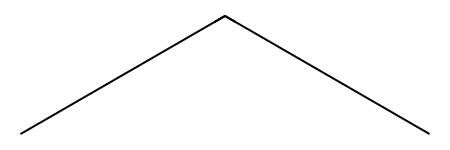

In [7]:
# mol 객체를 출력하면 해당 분자의 그림을 그려준다
propane

# Mol 블록 파일

- Mol 블록 파일은 분자에 대한 상세한 정보를 텍스트 파일로 표현하며 분자를 구성하는 원자, 결합, 좌표정보 등을 포함한다
- Chem 모듈이 제공하는 MolToMolBlock 함수로 Mol 블로 파일을 얻을 수 있다

In [8]:
# Mol 객체로부터 MOL 블록을 얻기
print(Chem.MolToMolBlock(propane))


     RDKit          2D

  3  2  0  0  0  0  0  0  0  0999 V2000
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2990    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5981   -0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
M  END



## Mol 블록 저장하기

- Mol 블록을 텍스트 파일로 저장하기

In [9]:
with Chem.SDWriter('propane.mol') as w:
    w.write(propane)

In [10]:
# 저장된 mol 파일 확인하기
!head propane.mol


     RDKit          2D

  3  2  0  0  0  0  0  0  0  0999 V2000
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2990    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5981   -0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
M  END


- 다수의 SMILES, mol 객체, mol 블록 파일 다루기
- 딕셔너리를 사용하겠다

In [11]:
# Glycine, Phenylalanine, Histidine, Cysteine 의 SMILES
smiles_dict = {'Glycine' : 'C(C(=O)O)N', 'Phenylalanine' : 'N[C@@H](CC1=CC=CC=C1)C(O)=O', 'Histidine' : 'O=C([C@H](CC1=CNC=N1)N)O', 'Cysteine' : 'C([C@@H](C(=O)O)N)S'}
smiles_dict

{'Glycine': 'C(C(=O)O)N',
 'Phenylalanine': 'N[C@@H](CC1=CC=CC=C1)C(O)=O',
 'Histidine': 'O=C([C@H](CC1=CNC=N1)N)O',
 'Cysteine': 'C([C@@H](C(=O)O)N)S'}

- SMILES 딕셔너리로부터 mol객체 딕셔너리를 만든다
- MolFromSmiles 함수를 사용한다
- mol_dict에 key와 value로 저장하겠다

In [12]:
mol_dict = {}
for molecule in smiles_dict.keys():
    mol = Chem.MolFromSmiles(smiles_dict[molecule])
    mol_dict[molecule] = mol
mol_dict

{'Glycine': <rdkit.Chem.rdchem.Mol at 0x7fa8a80864a0>,
 'Phenylalanine': <rdkit.Chem.rdchem.Mol at 0x7fa8a8086580>,
 'Histidine': <rdkit.Chem.rdchem.Mol at 0x7fa8a80865f0>,
 'Cysteine': <rdkit.Chem.rdchem.Mol at 0x7fa8a8086660>}

In [13]:
# 여러 화합물의 Mol 블록들을 하나의 파일에 묶어 저장할 때는 sdf 확장자를 사용한다

with Chem.SDWriter(f'ALL.sdf') as w:
    for molecule in mol_dict.keys():
        w.write(mol_dict[molecule])

In [14]:
# 저장된 sdf 파일 확인하기
!head -40 ALL.sdf


     RDKit          2D

  5  4  0  0  0  0  0  0  0  0999 V2000
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2990    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2990    2.2500    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    2.5981   -0.0000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2990    0.7500    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  2  0
  2  4  1  0
  1  5  1  0
M  END
$$$$

     RDKit          2D

 12 12  0  0  0  0  0  0  0  0999 V2000
    3.0000   -2.5981    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    3.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0

# SMILES 예시

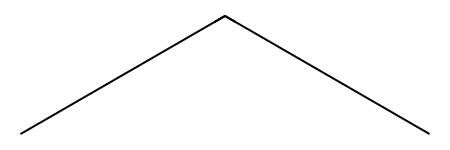

In [15]:
# mol 객체 보기
Chem.MolFromSmiles("CCC")

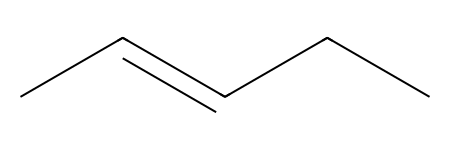

In [16]:
# 이중결합
Chem.MolFromSmiles("CC=CCC") # 2-pentene

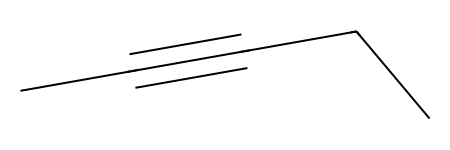

In [17]:
# 삼중결합
Chem.MolFromSmiles("CC#CCC") # triple pentene

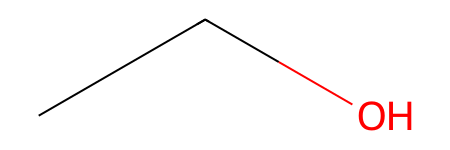

In [18]:
# 기본적인 H는 표시되지 않는다
Chem.MolFromSmiles("CCO") # ethanol

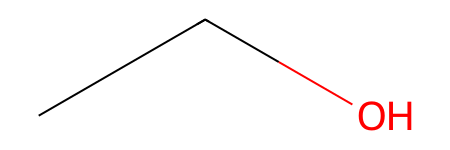

In [19]:
# 명시적으로 H를 표현할 수 있다
Chem.MolFromSmiles("CC[OH]") # ethanol

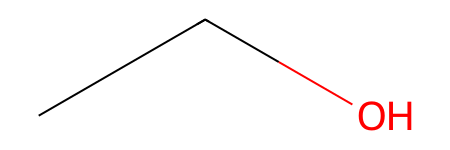

In [20]:
Chem.MolFromSmiles("[CH3][CH2][OH]") # ethanol

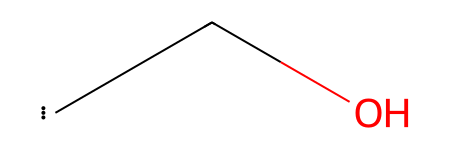

In [21]:
Chem.MolFromSmiles("[C][CH2][OH]") # ethanol

## 전하 표시

- 전하를 표시하려면 원자와 H를 포함하여 + - 를 [ ] 안에 표시한다

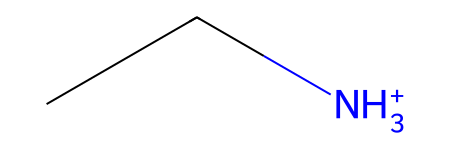

In [23]:
Chem.MolFromSmiles("CC[NH3+]") # ethylamine

## 브랜치 표시
- 브랜치는 ( ) 로 표시한다

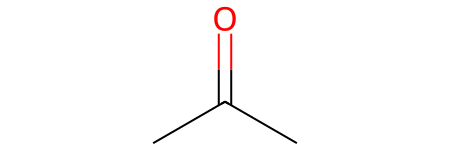

In [24]:
Chem.MolFromSmiles("CC(=O)C") # acetone (carbonyl표현 C=O)

- 공유결합으로 연결되지 않은 원자는 '.'으로 분리한다

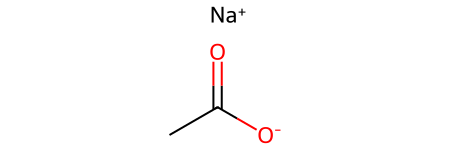

In [25]:
Chem.MolFromSmiles("CC(=O)[O-].[Na+]")

## 링구조

- 임의의 동일한 번호로 링의 시작과 끝을 표시한다

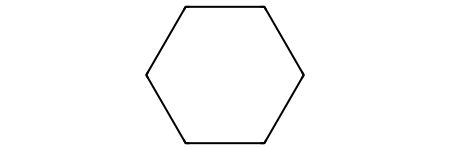

In [26]:
Chem.MolFromSmiles("C1CCCCC1")

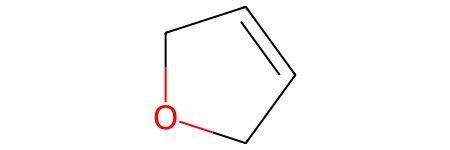

In [27]:
Chem.MolFromSmiles("C1=CCOC1")

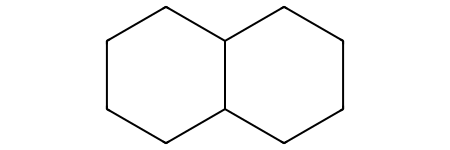

In [28]:
# fused ring
Chem.MolFromSmiles("C12CCCCC1CCCC2")

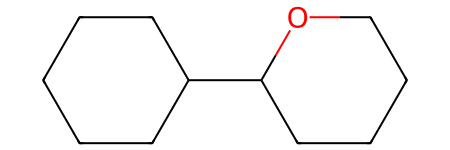

In [29]:
Chem.MolFromSmiles("C1CCCCC1C2CCCCO2")

- 아로마틱 본드는 소문자로 표시

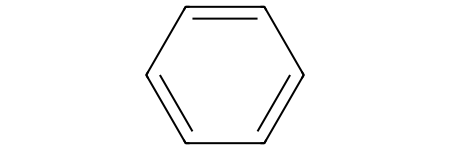

In [30]:
# benzene
Chem.MolFromSmiles("c1ccccc1")

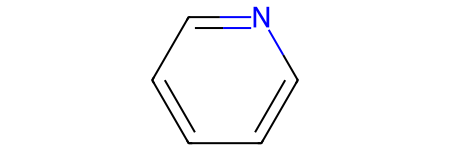

In [31]:
# pyridine
Chem.MolFromSmiles("c1ccccn1")

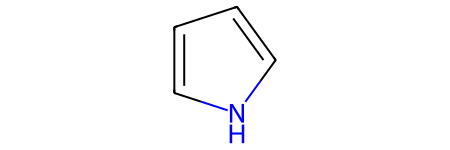

In [32]:
# 아로마틱 nitrogen이 수소와 결합한 경우는 수소를 명시적으로 표시해야 함
Chem.MolFromSmiles("c1ccc[nH]1")

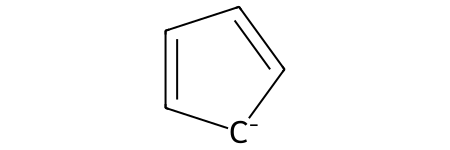

In [33]:
# 아로마틱 카본이 전하를 가진 경우 해당 원자를 명시해야 함
Chem.MolFromSmiles("c1ccc[cH-]1") # cyclopentadienyl anion

- 키랄(chiral) 구조는 @와 @@로 표현한다
- 해당 원자는 [ ] 안에 표시하며 붙어있는 수소원자도 표시해야 한다

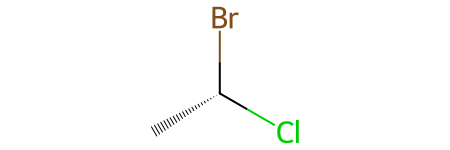

In [34]:
# 반시계 방향
Chem.MolFromSmiles("[C@H](C)(Cl)(Br)")

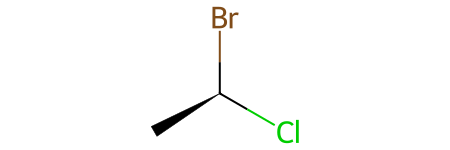

In [35]:
# 시계 방향
Chem.MolFromSmiles("[C@@H](C)(Cl)(Br)")

##  Canonical SMILES

- 동일한 분자를 표현하는 SMILES가 여러가지 표현법이 있을 수 있다

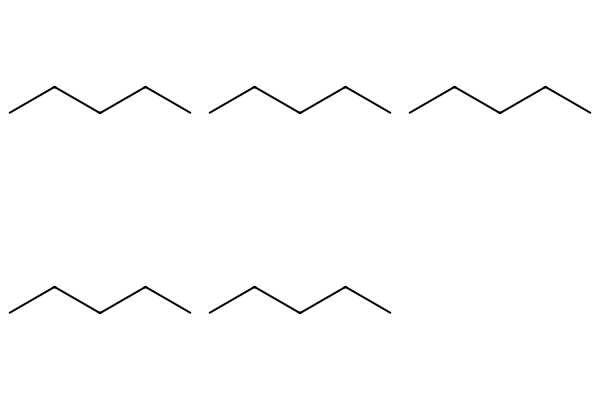

In [40]:
# 아래의 SMILES는 모두 같은 분자를 나타낸다
pentane_smiles_list = ["CCCCC","C(CCCC)","C-C-C-C-C","[CH3][CH2][CH2][CH2][CH3]","CC(CCC)"]

pentane_mol_list = [Chem.MolFromSmiles(x) for x in pentane_smiles_list]
Chem.Draw.MolsToGridImage(pentane_mol_list)

- MolToSmiles를 사용하여 "동일한(canonical)" SMILES를 얻을 수 있다

In [42]:
for mol in pentane_mol_list:
    pentane_smiles = Chem.MolToSmiles(mol,canonical=True)
    print(pentane_smiles)

CCCCC
CCCCC
CCCCC
CCCCC
CCCCC
